# Pre-process Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN


In [20]:
# Load the airline data 
airline_data = pd.read_excel("/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/7 clustering/EastWestAirlines.xlsx", sheet_name='data')

In [21]:
airline_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [22]:
# Column rename.
airline_data= airline_data.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [23]:
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

airline1 =  airline_data.drop(['ID','Award'], axis=1)
airline1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [24]:
from sklearn.preprocessing import normalize

In [25]:
# Normalize heterogenous numerical data 
airline1_norm=pd.DataFrame(normalize(airline1),columns=airline1.columns)
airline1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718
...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509


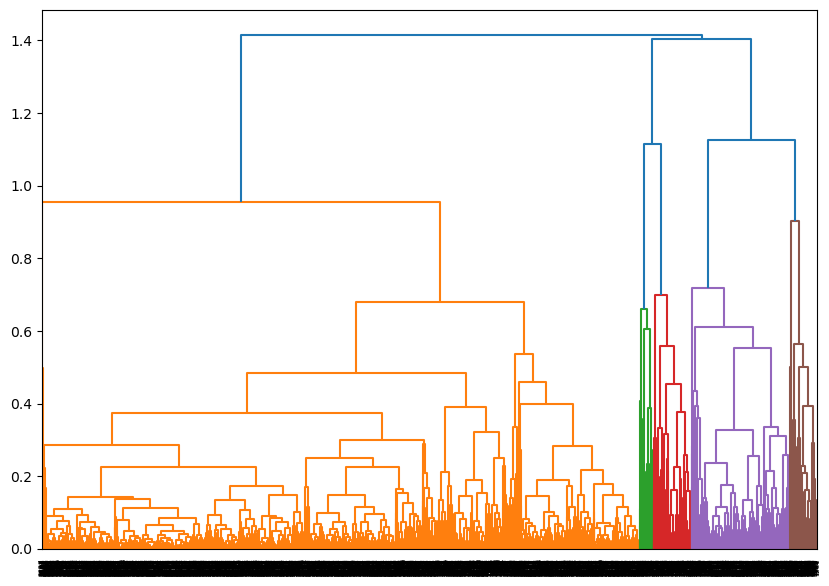

In [27]:
# Create Dendrograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline1_norm,'complete'))

In [28]:
#we use dendogram to identify optimal number of clusters

# hierarchical clustering

In [29]:
# Perform hierarchical clustering with 5 clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_cluster.fit_predict(airline1_norm)


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
# Add the cluster labels to the airlines_data DataFrame
airline1['hierarchical_cluster'] = hierarchical_labels

# Analyze the number of clusters formed
num_clusters = len(np.unique(hierarchical_labels))
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 5


In [31]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hierarchical_cluster
0,28143,0,1,1,1,174,1,0,0,7000,4
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,3
3995,64385,0,1,1,1,981,5,0,0,1395,4
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,4


In [32]:
# Group the clusters and compute mean values
cluster_means = airline1.groupby('hierarchical_cluster').agg(['mean']).reset_index()

# Print the resulting DataFrame
print(cluster_means)

  hierarchical_cluster       Balance  Qual_miles cc1_miles cc2_miles  \
                                mean        mean      mean      mean   
0                    0   5524.222707    8.755459  1.000000  1.000000   
1                    1  31066.514349  111.415011  3.200883  1.026490   
2                    2  81201.080802  136.521008  2.115061  1.013575   
3                    3  69569.894646   97.257340  3.326425  1.032815   
4                    4  94957.590260  215.220823  1.141058  1.005038   

  cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
       mean          mean        mean              mean            mean   
0  1.000000    584.532751    2.401747         66.982533        0.209607   
1  1.070640  40266.935982   17.289183        626.754967        1.812362   
2  1.000646  16350.149968   13.574014        488.550743        1.340659   
3  1.022453  35743.675302   17.784111        406.804836        1.274611   
4  1.002519   3524.928631    5.640638        

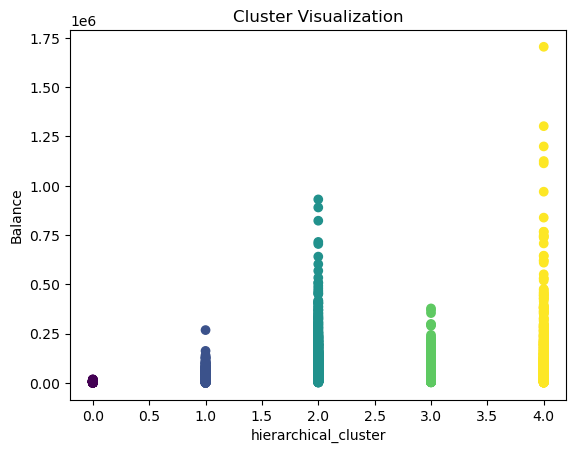

In [34]:
# Visualize the clusters
plt.scatter(airline1['hierarchical_cluster'], airline1['Balance'], c=airline1['hierarchical_cluster'])
plt.xlabel('hierarchical_cluster')
plt.ylabel('Balance')
plt.title('Cluster Visualization')
plt.show()

In [ ]:
#It seems that the balance generally increases from cluster 0 to cluster 4.
#average qualifying miles also increase from cluster 0 to cluster 4.
#It seems that the average miles earned are relatively consistent across the clusters for cc1_miles and cc3_miles, while there is a slight increase in cc2_miles from cluster 0 to cluster 4.
#Cluster 1 has the highest average bonus miles, followed by cluster 3, while cluster 0 has the lowest average.
#Cluster 1 and cluster 3 have a higher average number of bonus transactions compared to the other clusters.
#Cluster 1 has the highest average flight miles, followed by cluster 2, while cluster 0 has the lowest average.
#Cluster 1 has the highest average number of flight transactions, followed by cluster 4, while cluster 0 has the lowest average.
#Cluster 0 has the highest average number of days since enrollment, followed by cluster 2, while cluster 4 has the lowest average.

# Kmeans Clustering

In [36]:
# Perform K-means clustering with 5 clusters
kmeans_cluster = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_cluster.fit_predict(airline1_norm)


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
# Add the cluster labels to the crime DataFrame
airline1['kmeans_cluster'] = kmeans_labels

# Analyze the number of clusters formed
num_clusters = len(set(kmeans_labels))
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 5


In [42]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hierarchical_cluster,kmeans_cluster
0,28143,0,1,1,1,174,1,0,0,7000,4,2
1,19244,0,1,1,1,215,2,0,0,6968,2,1
2,41354,0,1,1,1,4123,4,0,0,7034,2,2
3,14776,0,1,1,1,500,1,0,0,6952,2,1
4,97752,0,4,1,1,43300,26,2077,4,6935,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,3,0
3995,64385,0,1,1,1,981,5,0,0,1395,4,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,4,2


In [45]:
# Group the clusters and compute mean values
columns_to_include = ['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','kmeans_cluster']
cluster_means = airline1[columns_to_include].groupby('kmeans_cluster').mean().reset_index()

# Print the resulting DataFrame
print(cluster_means)

   kmeans_cluster       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0               0  70955.678679  114.680681   3.143143   1.026026   1.020020   
1               1  11756.307494   55.263566   1.005168   1.000000   1.000000   
2               2  97159.332404  185.770804   1.606695   1.009298   1.001860   
3               3  27462.797721  116.148148   3.245014   1.034188   1.071225   
4               4   2415.576577    0.000000   1.009009   1.000000   1.000000   

    Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  
0  32712.445445    17.696697         447.920921         1.323323  
1    980.863049     3.444444          93.457364         0.294574  
2   9639.506741     9.706648         518.477917         1.559740  
3  41806.162393    17.572650         670.883191         1.945869  
4    850.189189     3.036036          48.612613         0.171171  


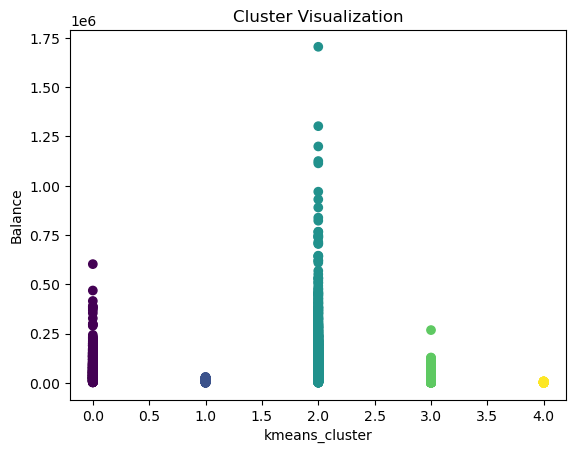

In [48]:
# Visualize the clusters
plt.scatter(airline1['kmeans_cluster'], airline1['Balance'], c=airline1['kmeans_cluster'])
plt.xlabel('kmeans_cluster')
plt.ylabel('Balance')
plt.title('Cluster Visualization')
plt.show()

In [57]:
#It seems that the balance varies significantly across the clusters, with cluster 2 having the highest average balance and cluster 4 having the lowest average balance.
#Cluster 2 has the highest average qualifying miles, followed by cluster 3, while cluster 4 has no qualifying miles.
#Cluster 3 has the highest average cc2_miles, and cluster 1 has the lowest average cc2_miles. Cluster 1, cluster 2, and cluster 3 have higher average cc3_miles compared to cluster 0 and cluster 4.
#Cluster 3 has the highest average bonus miles, followed by cluster 0, while cluster 4 has the lowest average bonus miles.
#Cluster 0 and cluster 3 have a higher average number of bonus transactions compared to the other clusters.
#Cluster 3 has the highest average flight miles, followed by cluster 2, while cluster 4 has the lowest average flight miles.
#Cluster 3 has the highest average number of flight transactions, followed by cluster 2, while cluster 4 has the lowest average number of flight transactions.

# DBSCAN Clustering

In [50]:
# Perform DBSCAN clustering
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_cluster.fit_predict(airline1_norm)

In [52]:
# Add the cluster labels to the crime DataFrame
airline1['dbscan_cluster'] = dbscan_labels

# Analyze the number of clusters formed
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 1


In [53]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hierarchical_cluster,kmeans_cluster,dbscan_cluster
0,28143,0,1,1,1,174,1,0,0,7000,4,2,0
1,19244,0,1,1,1,215,2,0,0,6968,2,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,2,2,0
3,14776,0,1,1,1,500,1,0,0,6952,2,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,3,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,4,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,4,2,0


In [54]:
# Group the clusters and compute mean values
columns_to_include = ['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','dbscan_cluster']
cluster_means = airline1[columns_to_include].groupby('dbscan_cluster').mean().reset_index()

# Print the resulting DataFrame
print(cluster_means)

   dbscan_cluster       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0               0  73601.327582  144.114529   2.059515   1.014504   1.012253   

    Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  
0  17144.846212      11.6019         460.055764         1.373593  


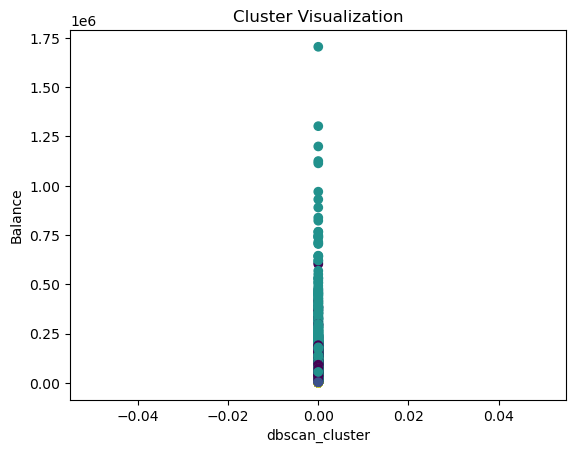

In [55]:
# Visualize the clusters
plt.scatter(airline1['dbscan_cluster'], airline1['Balance'], c=airline1['kmeans_cluster'])
plt.xlabel('dbscan_cluster')
plt.ylabel('Balance')
plt.title('Cluster Visualization')
plt.show()

In [58]:
#The average balance in the DBSCAN cluster is 73,601.33. This represents the central tendency of the balance values within the cluster.
#The average qualifying miles in the DBSCAN cluster is 144.11,which is the typical number of qualifying miles earned by customers within the cluster.
#On average, customers within the cluster tend to earn a moderate number of miles across all credit card types.
#number of bonus miles accumulated by customers within the cluster:17144.846212
#typical frequency of bonus transactions carried out by customers within the cluster:11.60
# typical flight activity of customers within the cluster: 460.06
#ypical frequency of flight transactions conducted by customers within the cluster: 1.37